In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
goolam_d=pd.read_csv('count_goolam.csv')
goolami=pd.read_csv('goolam_imputed.csv',header=None)
goolam=goolam_d.values
goolamimp=goolami.values

In [3]:
goolam[2][46]

0.0

In [4]:
goolamimp[2][46]

3.83304580843968

In [5]:
goolam_t=np.transpose(goolam)

In [6]:
goolam_t.shape

(124, 10057)

In [7]:
import csv

with open("goolam_unimputed_t.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(goolam_t)

In [8]:
import numpy as np
import pandas as pd
import scanpy as sc

In [9]:
adata=sc.read_csv('goolam_unimputed_t.csv',delimiter=',', first_column_names=None, dtype='float32')

In [10]:
adata

AnnData object with n_obs × n_vars = 124 × 10057

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

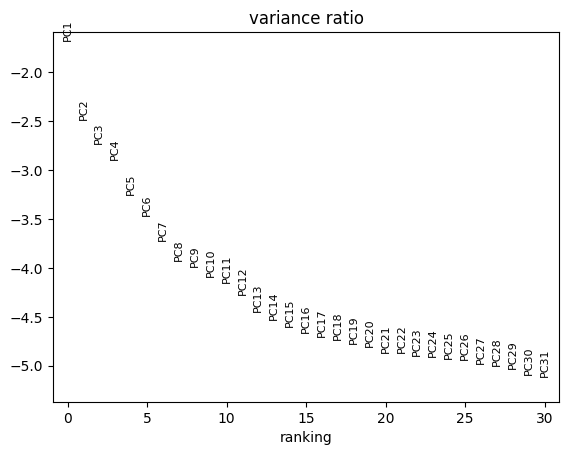

In [12]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [13]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata5)
##visualizing clusters
#sc.pl.umap(adata5, color=['leiden'])

/home/zaman/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


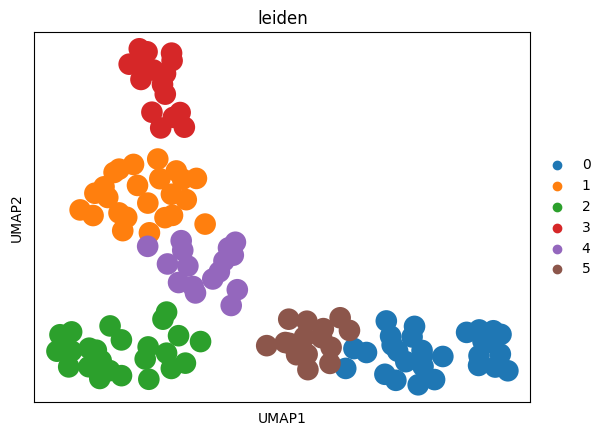

In [14]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [15]:
adata.obs['leiden']

0      3
1      3
2      3
3      3
4      3
      ..
119    2
120    2
121    2
122    2
123    2
Name: leiden, Length: 124, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
silhouette_avg

0.028705157

In [17]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('goolam_annotation.txt',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_4255/3726941761.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('goolam_annotation.txt',dtype=None, delimiter=",")


In [18]:
l1

array([b'2cell', b'2cell', b'2cell', b'2cell', b'2cell', b'2cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'16cell', b'16cell', b'16cell', b'16cell',
       b'16cell', b'16cell', b'blast', b'blast', b'blast', b'blast',
       b'blast', b'blast', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',

In [19]:
l2

0      3
1      3
2      3
3      3
4      3
      ..
119    2
120    2
121    2
122    2
123    2
Name: leiden, Length: 124, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [20]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

0.39810028515980184